<a href="https://colab.research.google.com/github/henriquepgomide/caRtola/blob/master/src/python/colabs/caRtola_media_media_movel_media_casa_ou_fora_o_que_usar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CartolaPFC - Para escolher jogadores, você deve continuar usando a média geral ou usar a média ajustada por mando de campo?** 

Por Henrique Gomide

**🦥 TL;DR**: Dependendo do jogador é melhor usar média em casa e fora. De maneira geral, use a média. Desconfie da média geral nas 4 primeiras rodadas e da média ajustada por mando de campo até a rodada 10.


# **Problema**

Olá! Hoje tentaremos responder qual é o melhor scout que você pode usar para escolher seus jogadores para a próxima rodada.


Muitos sites propõem um conjunto de medidas. O Cartola FC da Globo nos mostra apenas a média de um determinado jogador. Enquanto outros sites como o Olheiro FC, Cartomante e o Cartola PFC, oferecem as médias em casa e fora. Afinal, o que vale a pena usar e em quais rodadas?


Neste tutorial, tentaremos responder a pergunta usando os dados de 2019. 

Você também aprenderá a calcular a média ajustada por mando de campo para usar em suas escalações usando Python.


In [1]:
# Importar bibliotecas
import re                          # Expressão regulares
import requests                    # Acessar páginas da internet
from bs4 import BeautifulSoup      # Raspar elementos de páginas da internet
import numpy as np
import pandas as pd                # Abrir e concatenar bancos de dado
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

# Funções para ler dados do Cartola FC
def read_cartola_data(year):
    '''
    Read data from a given year of the CaRtola repository

    Parameters:
    year (int) - year inside the range 2018-2020.
    ''' 

    if year in [2018, 2019, 2020]:

        # URL para baixar os arquivos
        url = 'https://github.com/henriquepgomide/caRtola/tree/master/data/{}'.format(year)
        html = requests.get(url)
    
        soup = BeautifulSoup(html.text, 'lxml')
    
        dict_of_files = {}
        for tag in soup.find_all('a', attrs={'href': re.compile('rodada-([0-9]|[0-9][0-9])\.csv')}):
            href_str = tag.get('href')
            file_name = re.sub('/henriquepgomide/caRtola/blob/master/data/{}/'.format(year), 
                            '', 
                            href_str)
            
            file_url = re.sub('/henriquepgomide/caRtola/blob/master/data/{}/'.format(year), 
                            'https://raw.githubusercontent.com/henriquepgomide/caRtola/master/data/{}/'.format(year), 
                            href_str)
            dict_of_files[file_name] = file_url
    
        list_of_dataframes = []
        for key, item in dict_of_files.items():
            df = pd.read_csv(item)
            df['rodada'] = key
            list_of_dataframes.append(df)
    
        df_cartola = pd.concat(list_of_dataframes)
    
        return df_cartola
    
    else:
        print('You need to add an year within the range: 2018 and 2020')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Ler dados
df = read_cartola_data(2019)
# Remover técnicos
df = df[df['atletas.posicao_id'] != 'tec']
df.shape

(29825, 34)

In [3]:
# Ver início do banco de dados
df.head()

,Unnamed: 0,atletas.nome,atletas.slug,atletas.apelido,atletas.foto,atletas.atleta_id,atletas.rodada_id,atletas.clube_id,atletas.posicao_id,atletas.status_id,atletas.pontos_num,atletas.preco_num,atletas.variacao_num,atletas.media_num,atletas.clube.id.full.name,FS,RB,PE,FC,G,FF,FT,FD,DD,GS,SG,A,CA,I,CV,PP,GC,DP,rodada
0,1,Glaybson Yago Souza Lisboa,yago-pikachu,Yago Pikachu,https://s.glbimg.com/es/sde/f/2018/09/27/ade8a...,80196,1,267,mei,Provável,2.0,11.1,-2.9,2.0,Vasco,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rodada-1.csv
1,2,Juan Ramón Cazares Sevillano,cazares,Cazares,https://s.glbimg.com/es/sde/f/2018/05/07/2952d...,81682,1,282,mei,Contundido,0.0,11.0,0.0,0.0,Atlético-MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rodada-1.csv
2,3,Alessandro Vinícius Gonçalves da Silva,alessandro-vinicius,Alessandro Vinícius,https://s.glbimg.com/es/sde/f/2019/03/30/ffa3d...,94495,1,282,mei,Nulo,0.0,1.0,0.0,0.0,Atlético-MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rodada-1.csv
3,4,Diego Alves Carreira,diego-alves,Diego Alves,https://s.glbimg.com/es/sde/f/2019/04/26/7bdef...,38509,1,262,gol,Contundido,0.0,5.0,0.0,0.0,Flamengo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rodada-1.csv
4,5,Réver Humberto Alves Araújo,rever,Réver,https://s.glbimg.com/es/sde/f/2019/03/29/d49f2...,52253,1,282,zag,Provável,0.0,16.0,0.0,0.0,Atlético-MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rodada-1.csv


Antes de começar é bom selecionarmos os jogadores que efetivamente jogaram o campeonato. Não faz muito sentido usar jogadores que disputaram poucas partidas. As médias seriam influenciadas por poucas observações, fato que atrapalharia nossas conclusões. 

Vamos apenas usar jogadores com no mínimo 18 partidas, aqueles que pelo menos disputaram um turno do campeonato.

In [4]:
# Criar dicionário com jogadores que jogaram no mínimo 18 partidas na temporada
players_more_than_18 = df.groupby(['atletas.atleta_id', 'atletas.status_id'])['atletas.status_id'].count()
players_more_than_18 = players_more_than_18.xs('Provável', level='atletas.status_id')
players_more_than_18 = players_more_than_18[players_more_than_18 >= 18].index.tolist()

df_players_more_than_18 = df[['atletas.slug', 'atletas.atleta_id']].copy()
df_players_more_than_18 = df_players_more_than_18[df_players_more_than_18['atletas.atleta_id'].isin(players_more_than_18)] \
.drop_duplicates()

dict_of_players_more_than_18 = df_players_more_than_18.set_index('atletas.atleta_id') \
.to_dict()['atletas.slug']

dict_of_players_more_than_18

{37646: 'betao',
 37655: 'rafael-moura',
 37656: 'fabio',
 37688: 'cicero',
 37694: 'henrique',
 38144: 'rafinha',
 38162: 'fred',
 38229: 'fabio-santos',
 38231: 'diego-tardelli',
 38277: 'thiago-neves',
 38279: 'wellington-paulista',
 38311: 'marcio-araujo',
 38451: 'carlinhos',
 38505: 'leandro-castan',
 38509: 'diego-alves',
 38515: 'marquinhos-silva',
 38545: 'felipe-melo',
 38750: 'filipe-luis',
 38913: 'nene',
 38959: 'vagner-love',
 42145: 'egidio',
 42222: 'osvaldo',
 42234: 'cassio',
 42491: 'marcio-azevedo',
 42500: 'fagner',
 50402: 'kayke',
 50459: 'leo',
 50645: 'eduardo',
 51042: 'apodi',
 51495: 'tiago-alves',
 51772: 'everton-ribeiro',
 52253: 'rever',
 54395: 'elias',
 60819: 'dede',
 60852: 'uendel',
 60969: 'patric',
 61188: 'gilberto',
 62009: 'camilo',
 62023: 'd-alessandro',
 62104: 'robinho',
 62129: 'wellington',
 62977: 'ganso',
 63013: 'marcos-rocha',
 63128: 'douglas',
 63194: 'carlinhos',
 63219: 'luan',
 63289: 'edenilson',
 68808: 'nino-paraiba',
 68872: 

# **Média**


Já temos uma lista de ids com jogadores que jogaram pelo menos um turno do Brasileirão 2019. Primeiro passo, analisaremos a média aritmética dos jogadores para cada posição. Menos os técnicos, que têm notas resultantes da média do desempenho de seus jogadores.

Para isso, vamos selecionar uma lista de jogadores que apresentaram as melhores médias do compeonato e plotar para identificar como a média pode nos ajudar a prever seus resultados.

In [5]:
# Selecionar top 10 atletas de 2019
top_df = df[(df['atletas.rodada_id'] == 38) & 
            (df['atletas.posicao_id'] != 'tec') & 
            (df['atletas.atleta_id']).isin(dict_of_players_more_than_18.keys())]

# Criar uma lista dos 10 melhores jogadores
top_players = top_df.sort_values('atletas.media_num', ascending=False).head(10)
top_players = top_players['atletas.atleta_id'].tolist()

In [6]:
# Avaliar pontuação dos jogadores ao longo da temporada
top_players_data = df[df['atletas.atleta_id'].isin(top_players)]

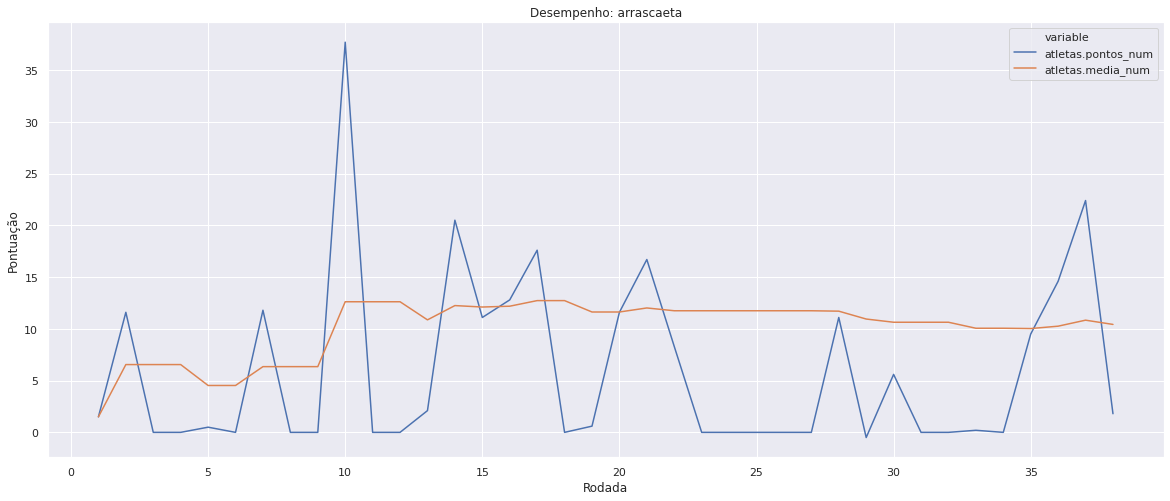

In [7]:
#@title Filtros de jogadores
#@markdown Escolha um jogador para avaliar sua média e seu desempenho.
select_player = 'arrascaeta' #@param ['arrascaeta', 'bruno-henrique', 'carlos-sanchez', 'gabriel','jordi','jorge', 'marcos-rocha', 'pedro-geromel','tadeu', 'victor-cuesta'] {allow-input: false}

data_to_plot = top_players_data[top_players_data['atletas.slug'] == select_player]

fig1 = data_to_plot[['atletas.slug', 'atletas.rodada_id', 'atletas.pontos_num',
                         'atletas.media_num']].copy()


fig1 = fig1.melt(id_vars=['atletas.slug', 'atletas.rodada_id'])
plt.figure(figsize=(20,8))
sns.lineplot(x='atletas.rodada_id', y='value', hue='variable', data=fig1)
plt.title(f'Desempenho: {select_player}')
plt.xlabel('Rodada')
plt.ylabel('Pontuação')
plt.show()
                

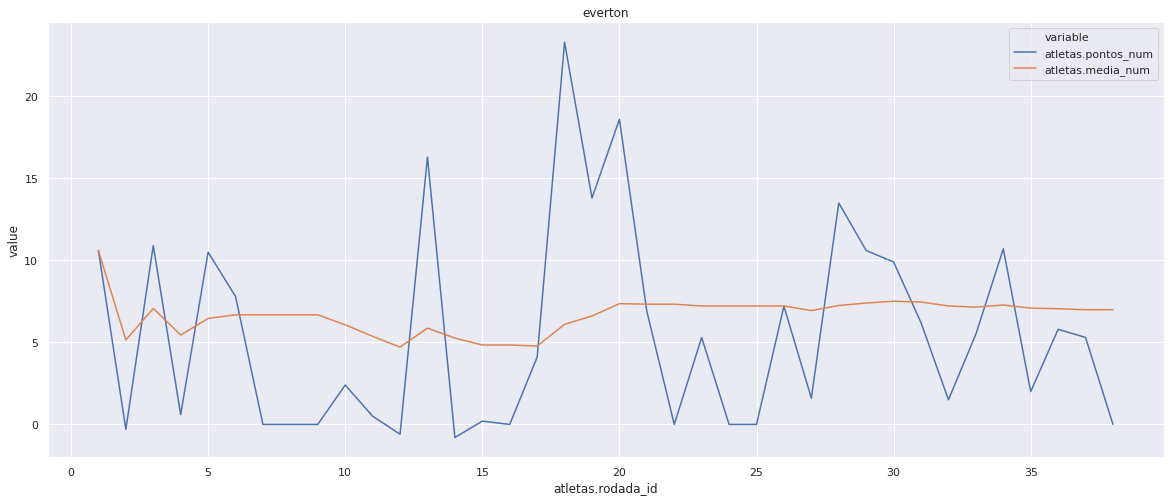

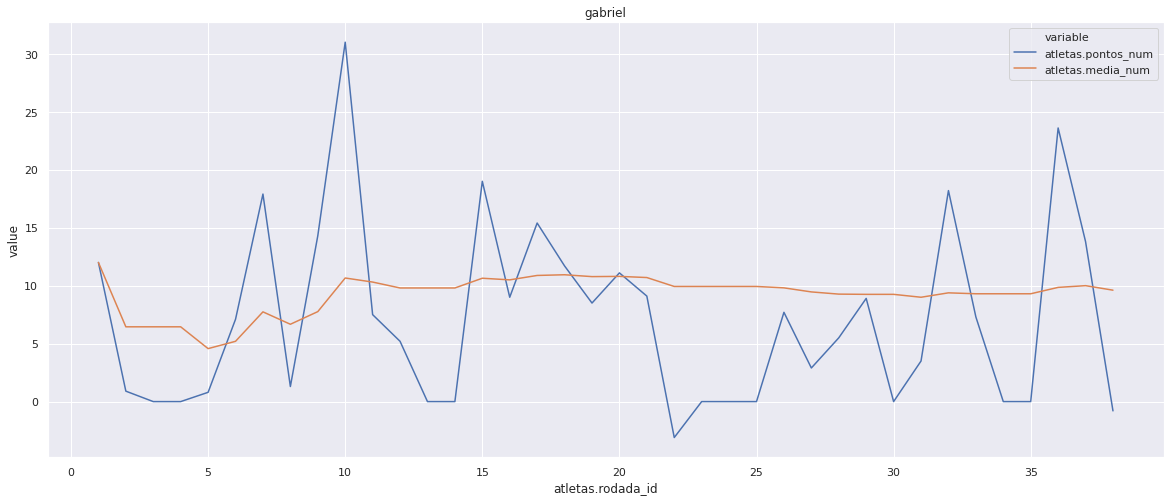

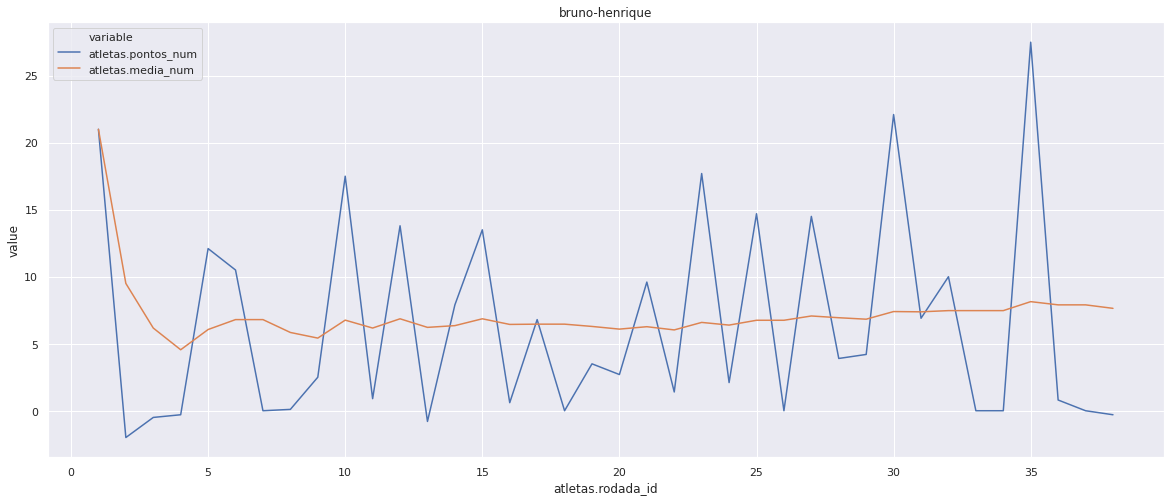

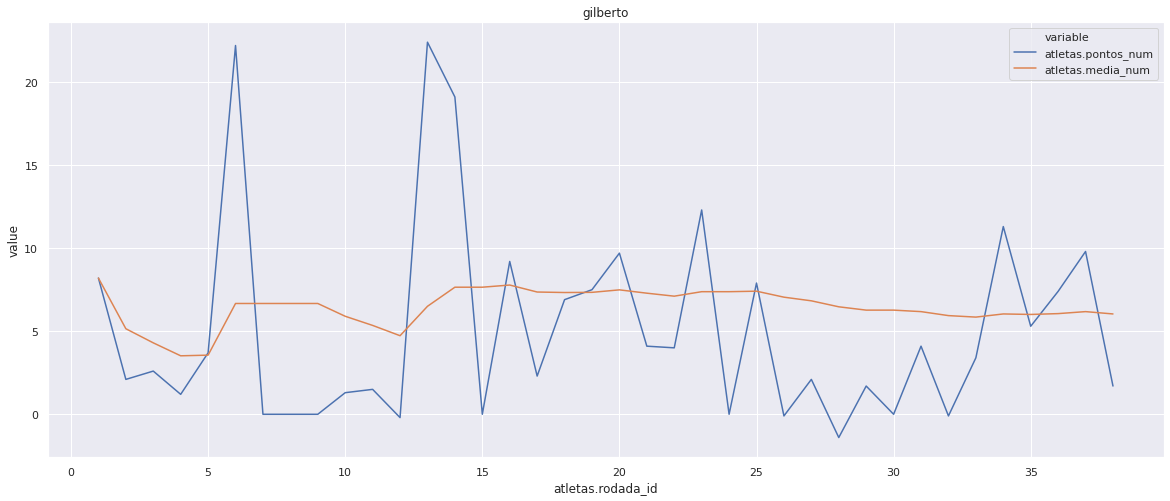

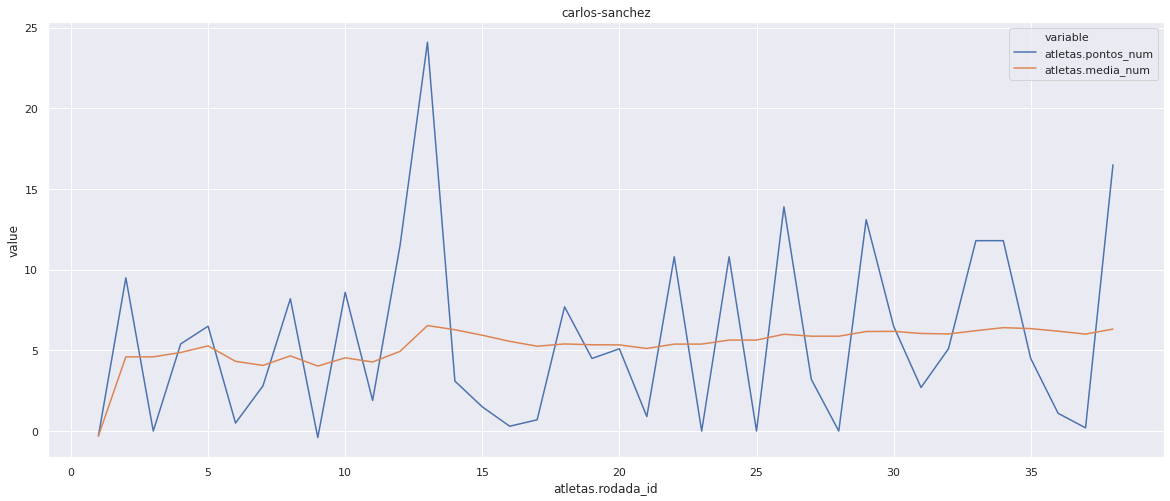

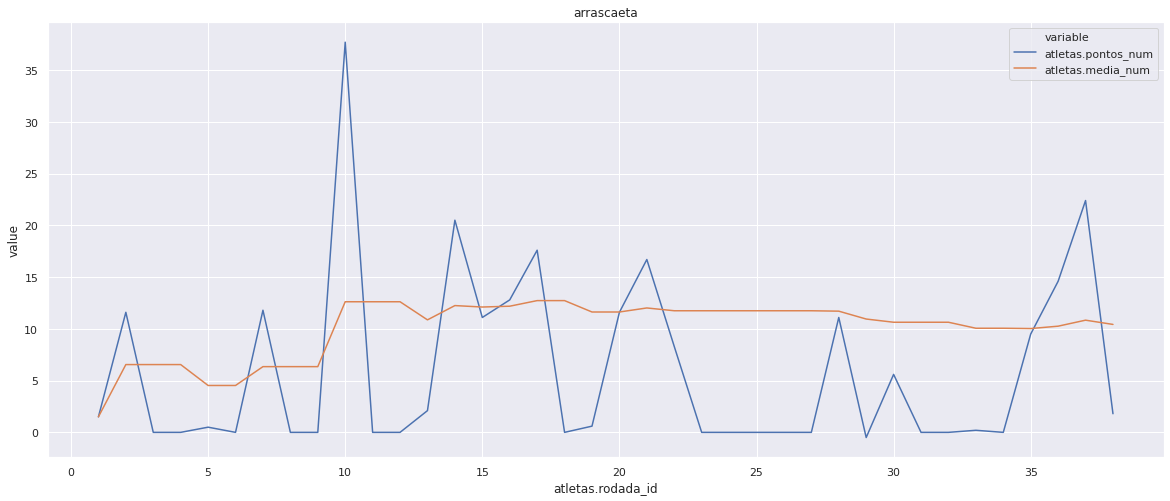

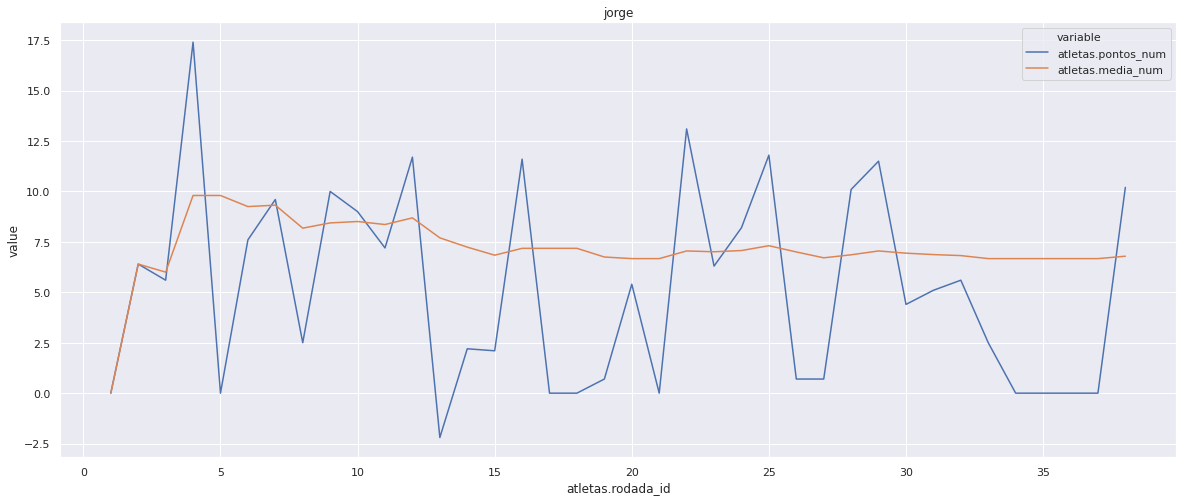

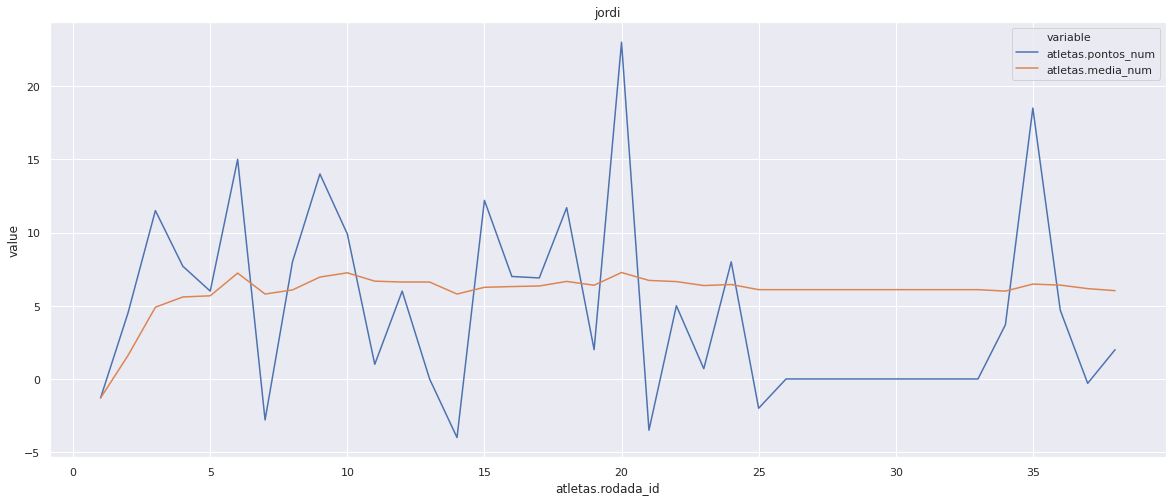

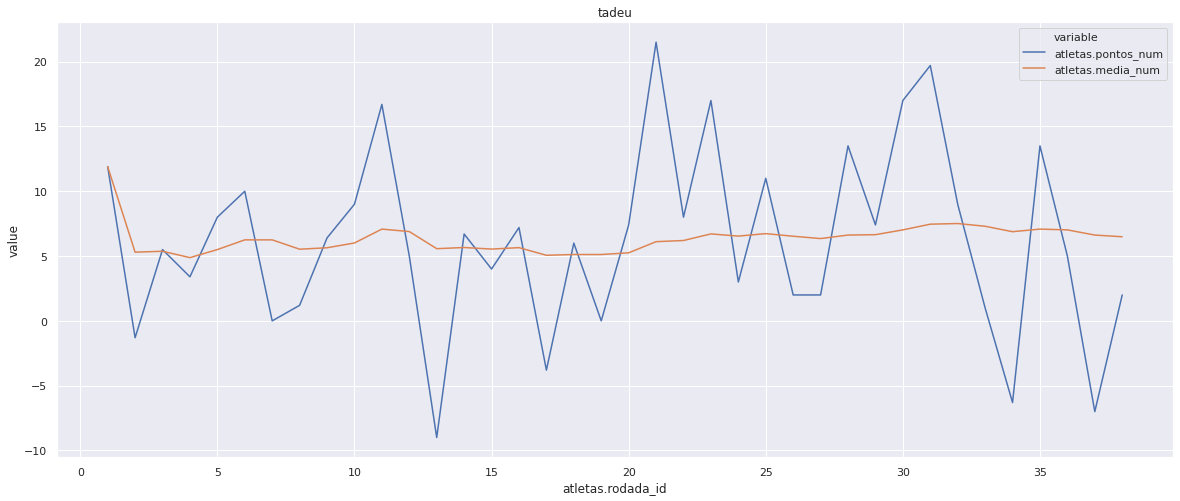

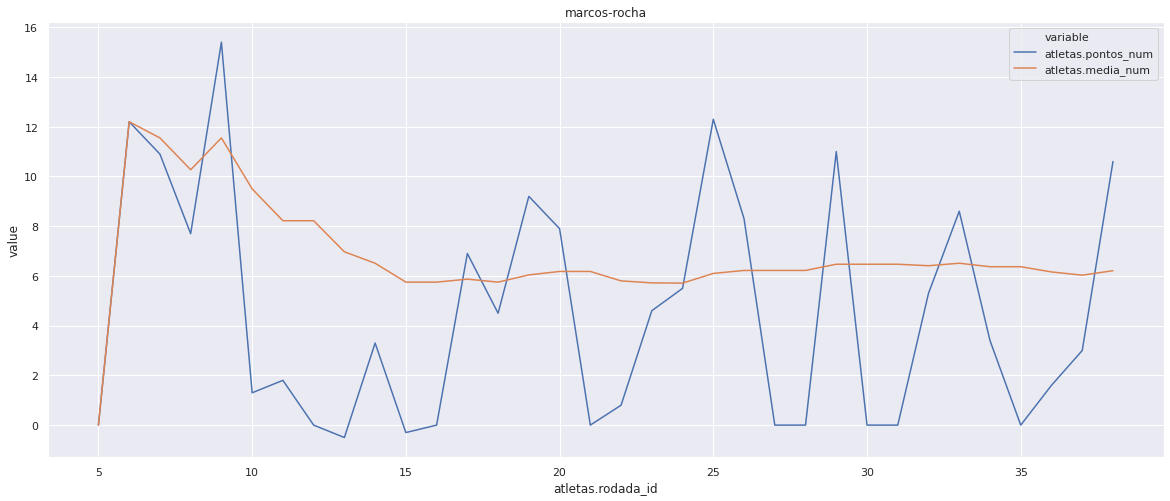

In [8]:
# Plotar média e pontuação
list_of_top_10 = pd.unique(top_players_data['atletas.slug'])

fig2 = top_players_data[['atletas.slug', 'atletas.rodada_id', 'atletas.pontos_num',
                         'atletas.media_num']].copy()

fig2 = fig2.melt(id_vars=['atletas.slug', 'atletas.rodada_id'])

#plt.subplot(5,2)
for index, player in enumerate(list_of_top_10):
    plt.figure(figsize=(20,8))
    data = fig2[fig2['atletas.slug'] == player]
    sns.lineplot(x='atletas.rodada_id', y='value', hue='variable', data=data)
    plt.title(player)

Podemos observar algumas características em comum do desempenho dos melhores jogadores do Cartola FC em 2019.

1. Há grande variabilidade de desempenho dos atletas.
2. Há padrões de desempenho dos jogadores. De maneira geral, a série apresenta valores altos seguidos de valores inferiores.
3. Jogadores do ataque parecem ter valores máximos maiores que jogadores de defesa.


Quais seriam possíveis hipóteses que explicam estas observações.

1. Jogar em casa pode ser um fator que explica o desempenho dos jogadores, mesmo os melhores jogadores.

2. É incrivelmente difícil escolher jogadores apenas com as médias, porque a pontuação dos jogadores possuí muita variabilidade.

### **Cálculo do erro da média**

Antes de criarmos as médias casa e fora, vamos usar indicadores numéricos de ajuste da série. Isso significa que queremos ter uma ideia do quanto a média acerta o desempenho de um determinado jogador.

Para isso, iremos começar com um jogador e depois expandir este indicador para todos os jogadores que participarem de um turno do Brasileirão 2019.

In [9]:
def estimate_loss_per_round(atleta_id):
    '''
    Estimar o erro da previsão da média para uma determinada id.

    Parâmetro:
    atleta_id (int): id do jogador de acordo com API do Cartola FC

    Exemplo:
    estimate_loss_per_round(80196)
    '''
    player_data = df[df['atletas.atleta_id'] == atleta_id]\
    .sort_values('atletas.rodada_id').copy()
    
    # Ajusatar valor da média e status dos jogadores
    player_data['media_ajustada'] = player_data['atletas.media_num'].shift(1)
    player_data['status'] = player_data['atletas.status_id'].shift(1)
    
    # Selecionar somente partidas jogadas
    player_data = player_data[(player_data['atletas.variacao_num'] != 0) & 
                                (~player_data['status'].isin(['Nulo', 'Suspenso'])) &
                                (player_data['atletas.pontos_num'] != 0)]
    
    # Criar diferença entre previsão da média e pontuação da rodada
    player_data['loss'] = np.sqrt((player_data['atletas.pontos_num'] - player_data['media_ajustada'])**2)
    
    
    player_data = player_data[['atletas.slug', 'atletas.atleta_id', 
                               'atletas.rodada_id', 'status', 'media_ajustada', 
                               'atletas.pontos_num', 'loss']].copy()

    return(player_data)

### Avaliando um jogador: Bruno Henrique

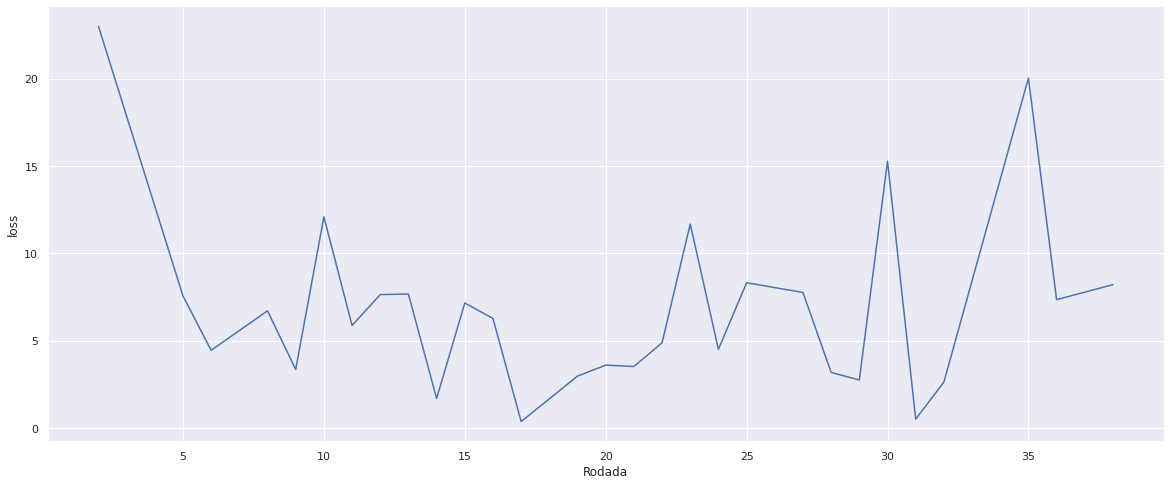

In [10]:
bruno_henrique = estimate_loss_per_round(90285)
plt.figure(figsize=(20,8))
sns.lineplot(x='atletas.rodada_id', y='loss', data=bruno_henrique)
plt.xlabel('Rodada')
plt.show()

Aparentemente a média nos oferece uma estimativa que ainda pode ser comparada contra alternativas mais robustas (média em casa e fora de casa). O que podemos perceber é que para Bruno Henrique, o erro entre a média a pontuação aumenta bastante a partir da rodada 30. Será apenas um artefato ou padrão dos jogadores. Vejamos...


### Avaliando os jogadores

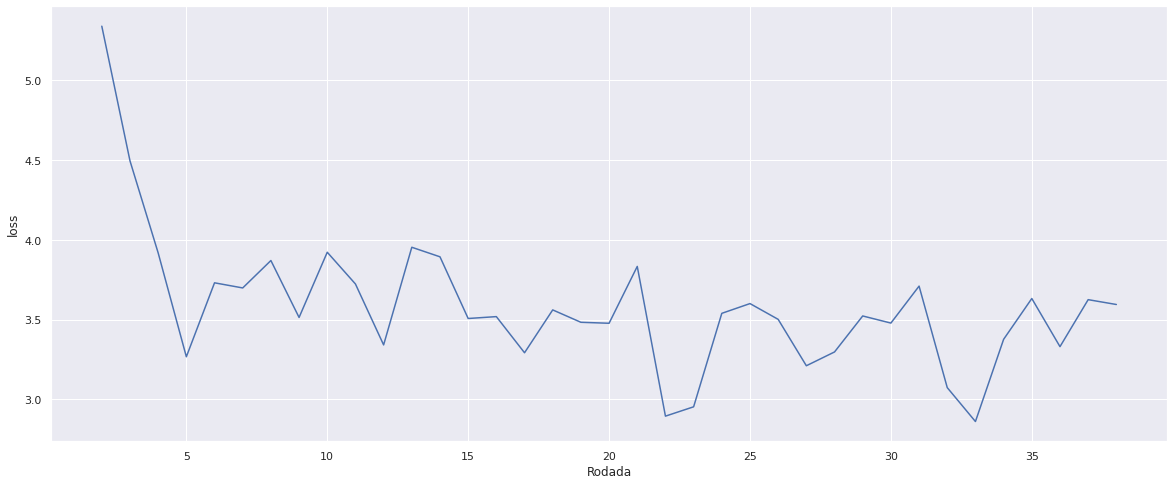

In [11]:
player_loss_data = []
for player_id in dict_of_players_more_than_18.keys():
    player_loss_data.append(estimate_loss_per_round(player_id))

df_losses = pd.concat(player_loss_data)
df_losses = df_losses.dropna()
df_losses = df_losses.groupby('atletas.rodada_id')['loss'].mean().reset_index()

plt.figure(figsize=(20,8))
sns.lineplot(x='atletas.rodada_id', y='loss', data=df_losses)
plt.xlabel('Rodada')
plt.show()

Nossa observação sobre Bruno Henrique não se assemelha ao comportamento do erro para todos jogadores - diferença entre a média e a pontuação dos jogadores. Percebemos que no início do campeonato, o erro está perto de cinco e passa a flutuar entre 3 e 4 por toda a temporada. 

### **O que podemos concluir disso?** 

Desconfie da média como indicador de desempenho nas quatro primeiras rodadas do campeonato.

<br>


---


# **Média em casa e fora**

Conseguimos perceber no desempenho dos jogadores, que há altos e picos. Seriam eles explicados pelo fator mando de campo? 

Vamos explorar esta hipótese agora. Vamos começar geral e depois prosseguirmos para os jogadores.

Para isso, primeiro pegaremos uma lista dos jogos de 2019 para saber quem jogou em casa e quem jogou fora.

In [12]:
# Abrir lista de partidas
partidas_2019 = pd.read_csv('https://raw.githubusercontent.com/henriquepgomide/caRtola/master/data/2019/2019_partidas.csv')
partidas_2019.head()

,date,home_team,away_team,home_score,away_score,round
0,2019-04-27,282,314,2,1,1
1,2019-04-27,315,285,2,0,1
2,2019-04-27,262,283,3,1,1
3,2019-04-27,276,263,2,0,1
4,2019-04-28,293,267,4,1,1


In [13]:
# Preparar banco de dados
partidas_2019 = partidas_2019[['home_team', 'away_team', 'round']]
partidas_2019 = partidas_2019.melt(id_vars='round', value_name='atletas.clube_id')
partidas_2019 = partidas_2019.rename(columns={'round': 'atletas.rodada_id', 
                                              'variable': 'home_away'})

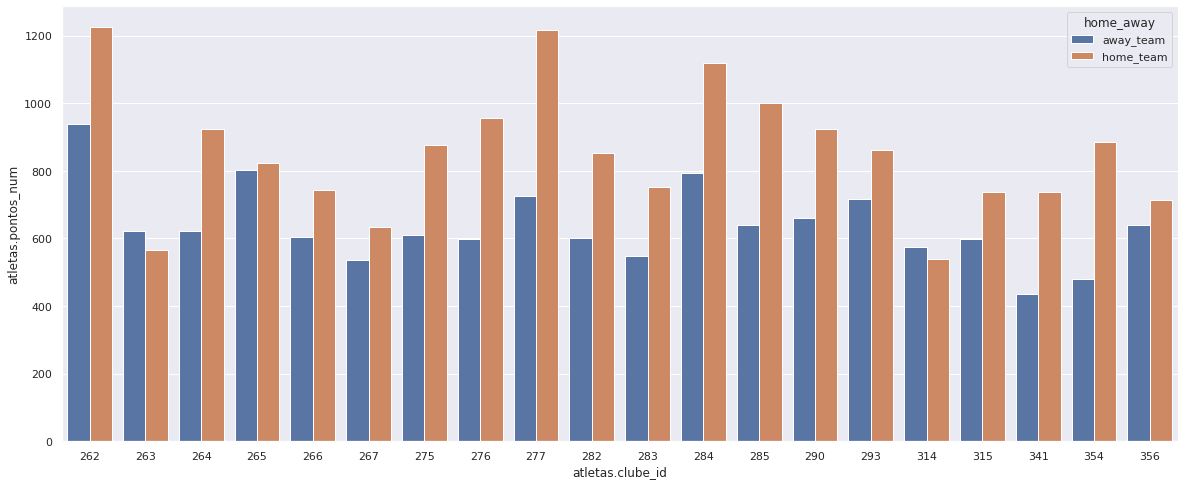

In [14]:
# Avaliar as diferenças dos escores dos jogadores dentro e fora de casa
df_home_away = df.merge(partidas_2019, how='left', on=['atletas.rodada_id', 'atletas.clube_id'])
df_home_away = df_home_away.groupby(['atletas.clube_id', 'home_away'])\
                ['atletas.pontos_num']\
                .sum().reset_index()
plt.figure(figsize=(20,8))            
sns.barplot(x='atletas.clube_id', 
            y='atletas.pontos_num',
            ci=None,
            hue='home_away',
            data=df_home_away)
plt.show()

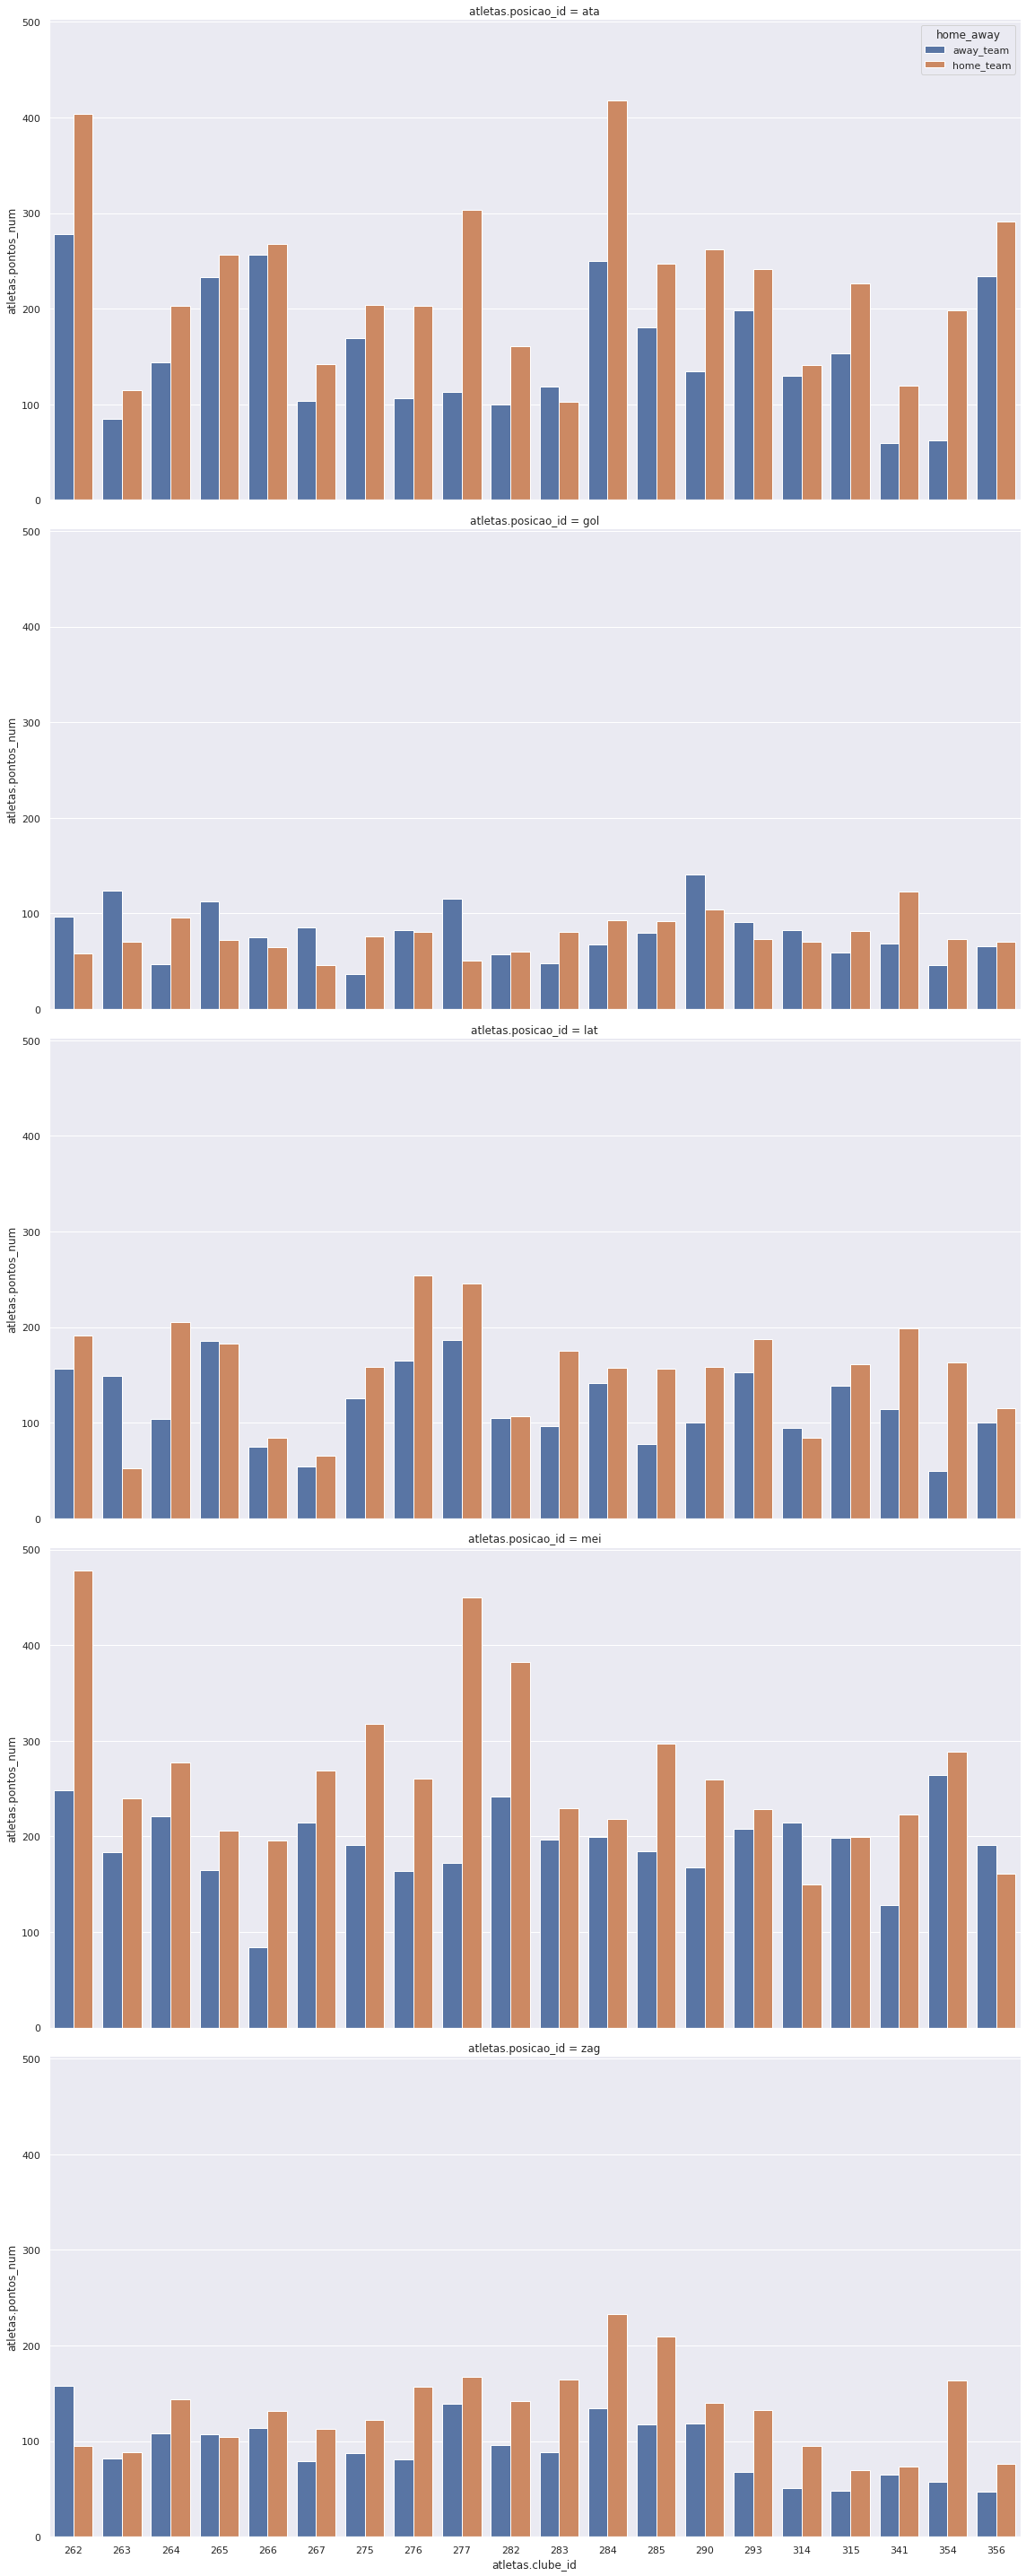

In [15]:
df_home_away = df.merge(partidas_2019, how='left', on=['atletas.rodada_id', 'atletas.clube_id'])
df_home_away = df_home_away.groupby(['atletas.clube_id', 'atletas.posicao_id', 'home_away'])\
                ['atletas.pontos_num']\
                .sum().reset_index()

sns.catplot(x='atletas.clube_id', 
            y='atletas.pontos_num',
            hue='home_away',
            col='atletas.posicao_id',
            kind='bar',
            col_wrap=1,
            height=8,
            aspect=2,
            legend_out=False,
            data=df_home_away)
plt.show()

Boas notícias! Fator mando de campo conta para a maioria dos times. Os times tendem a fazer mais pontos quando estão em casa. Mas no Cartola FC, escolhemos jogadores e não times. Vamos seguir nossa investigação e tentar prever os resultados dos jogadores usando suas médias quando estão jogando em casa ou fora.

### Avaliando um jogador: Bruno Henrique

Vamos repetir nossa ideia da seção anterior. Começaremos olhando um caso isolado e depois compararemos todos os jogadores que participaram de pelo menos um turno do campeonato.

In [16]:
# Separar bancos de dados entre casa e fora.
# Organizar por rodadas
# Separar somente houve pontuação
# Calcular média
df_home_away = df.merge(partidas_2019, how='left', 
                        on=['atletas.rodada_id', 'atletas.clube_id'])

def compute_mean_home_away(player_id):
    '''
    Compute mean and home scores averages for a given player:

    Keywords arguments: 
    player_id (id) -- player_id from cartola API (e.g., '90285')
    '''

    def compute_mean(player, home_away):
        '''
        Compute home or away mean.

        Keyword arguments:
        player (pd.Dataframe) -- a DataFrame for a specific player
        home_away (str) -- a column in a dataframe to estimate mean.

        Example:

        home_mean = compute_mean(player_df, 'home_team')
        '''
        player = player[player['home_away'] == home_away]\
        .sort_values('atletas.rodada_id')
    
        player['status'] = player['atletas.status_id'].shift(1)
        
        player = player[(player['atletas.variacao_num'] != 0) & 
                                    (~player['status'].isin(['Nulo', 'Suspenso'])) &
                                    (player['atletas.pontos_num'] != 0)]
        
        player['media_movel'] = player['atletas.pontos_num'].expanding().mean()
        player['media_movel'] = player['media_movel'].shift(1)
        return player
    
    player = df_home_away[df_home_away['atletas.atleta_id'] == player_id]

    home_mean = compute_mean(player, 'home_team')
    away_mean = compute_mean(player, 'away_team')

    player = pd.concat([home_mean, away_mean])
    player = player.sort_values('atletas.rodada_id')


    return player

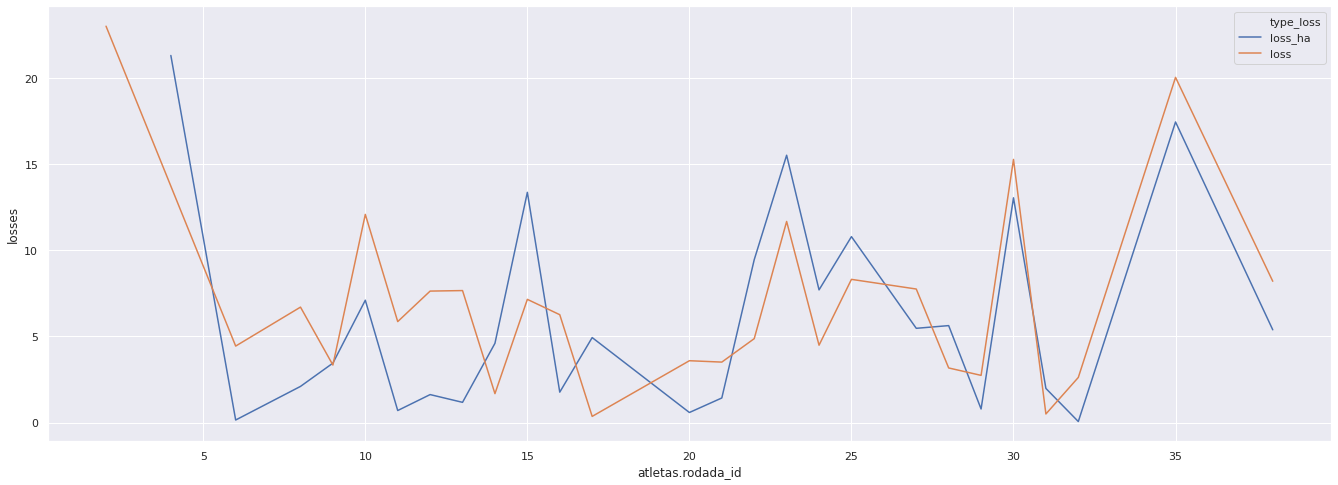

In [17]:
# Calcular erro para média
bruno_henrique_mean = estimate_loss_per_round(90285)
bruno_henrique_mean = bruno_henrique_mean[['atletas.atleta_id', 'atletas.rodada_id', 'loss']]

# Calcular erro para dentro e fora de casa
bruno_henrique_ha = compute_mean_home_away(90285)
bruno_henrique_ha['loss_ha'] = np.sqrt((bruno_henrique_ha['atletas.pontos_num'] - bruno_henrique_ha['media_movel'])**2)
bruno_henrique_ha = bruno_henrique_ha[['atletas.atleta_id', 'atletas.rodada_id', 'loss_ha']]

# Combinar bancos de dados
bruno_henrique = bruno_henrique_ha.merge(bruno_henrique_mean, 
                              how='left', 
                              on=['atletas.atleta_id', 'atletas.rodada_id'])

# Plotar gráfico para comparar erros
bruno_henrique = bruno_henrique.melt(id_vars=['atletas.atleta_id', 'atletas.rodada_id'],
                             var_name='type_loss',
                             value_name='losses')

plt.figure(figsize=(23,8))
sns.lineplot(x='atletas.rodada_id', y='losses',
             hue='type_loss',
             data=bruno_henrique)
plt.show()

In [18]:
# Calcular erros para média geral e média dentro e fora de casa.
bruno_henrique.pivot_table(values='losses', columns='type_loss', aggfunc='mean')

type_loss,loss,loss_ha
losses,7.033846,6.058622


#### Conclusão sobre um jogador


Podemos concluir para para Bruno Henrique, devemos usar a **média dentro e fora de casa**, uma redução do erro médio quadrado de aproximadamente 14%. 

Será verdade para o restante dos jogadores? 

## Avaliando os jogadores

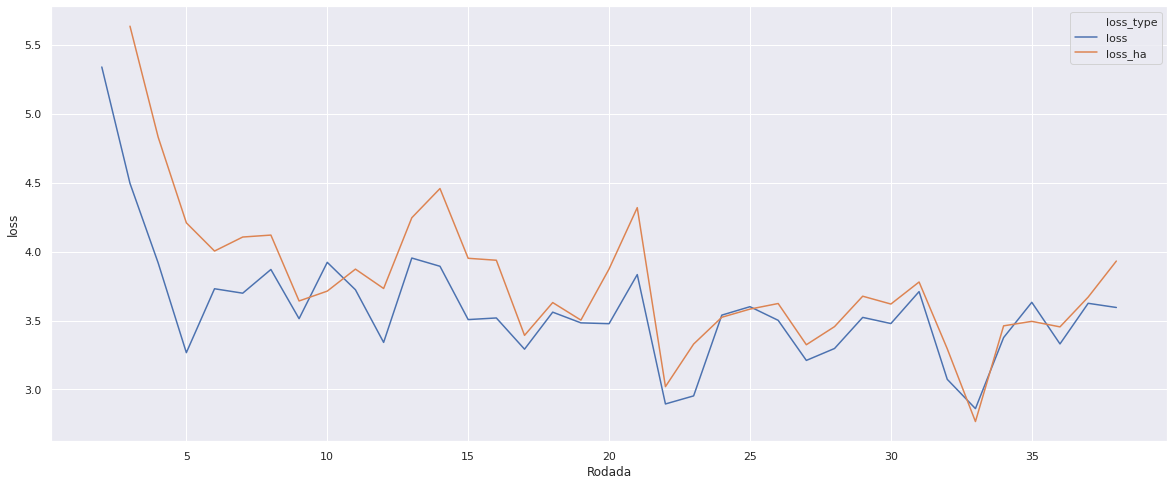

In [19]:
player_loss_data = []
for player in dict_of_players_more_than_18.keys():
    player_df = compute_mean_home_away(player)
    player_df['loss_ha'] = np.sqrt((player_df['atletas.pontos_num'] - player_df['media_movel'])**2)
    
    
    player_df = player_df[['atletas.atleta_id', 'atletas.rodada_id', 
                           'status', 'loss_ha']].copy()

    player_loss_data.append(player_df)

df_losses_ha = pd.concat(player_loss_data)
df_losses_ha = df_losses_ha.dropna()
df_losses_ha = df_losses_ha.groupby('atletas.rodada_id')['loss_ha'].mean().reset_index()

df_losses_fig = df_losses.merge(df_losses_ha,
                            how='left',
                            on='atletas.rodada_id')

df_losses_fig = df_losses_fig.melt(id_vars='atletas.rodada_id',
                           var_name='loss_type',
                           value_name='loss')

plt.figure(figsize=(20,8))
sns.lineplot(x='atletas.rodada_id', y='loss', 
             hue='loss_type',
             data=df_losses_fig)

plt.xlabel('Rodada')
plt.show()

#### **O que podemos concluir disso?**


Podemos observar que o erro da média geral (linha azul) é inferior a média ajustada por mando de campo. O que é especialmente destacado até aproximadamente a rodada 8. Vamos verificar agora a média do erro.


In [20]:
# Calcular erros para média geral e média dentro e fora de casa.
df_losses_fig.pivot_table(values='loss', columns='loss_type', aggfunc='mean')

loss_type,loss,loss_ha
loss,3.581817,3.782451


O erro da média geral é 4,2% menor. Talvez o melhor caminho é avaliar se jogadores possuem grande diferença de desempenho em casa e fora. Caso isso seja verdade, escolher usando a média ajustada por mando de campo. Caso contrário, confiar na média global que possui menor erro. 